# Lab 2: Runtime Analysis

## <font color=DarkRed>Your Exercise: Performance of `del` keyword</font>

Devise an experiment that compares the performance of the `del` operator on lists and dictionaries.

### Helpful Code

In [41]:
# Make two lists of random 'data'
import random 
arry1 = [random.random() for i in range(5000)]
arry2 = [random.random() for i in range(5000)]

# Create a simple dictionary of key:val pairs using these two lists
d1 = dict(zip(arry1,arry2)) 

# How the deletion of a dictionary key works
print(d1)
d_keys = list(d1.keys()) 
del d1[d_keys[0]]
print(d1)

# Print an empty line for spacing
print()

# How the deletion of a dictionary key works
print(arry1)
del arry1[0]
print(arry1)

{0.41526537867069224: 0.042794692952253466, 0.1704171818875886: 0.7442268223667037, 0.05174063230418413: 0.38374547507098755, 0.6079331605179266: 0.5645463471581849, 0.768142385858348: 0.5358373609847088, 0.958967373887312: 0.8920277396894594, 0.8880942421099143: 0.9862435973390102, 0.4017111330212285: 0.37100730543865057, 0.7010970160287026: 0.5210344954696513, 0.7407454638792699: 0.7963796880325292, 0.8670652824663352: 0.5925859925334469, 0.7157995152933558: 0.9628061083315763, 0.1470378103034795: 0.03504768842845096, 0.3568930283668147: 0.9657148187496363, 0.7430071525704541: 0.9511207608372181, 0.4304684050783876: 0.4111718826494908, 0.039306689895770686: 0.7924652234627333, 0.17964400047835594: 0.38766037596066516, 0.8318074620881051: 0.4488079543920487, 0.264661593584822: 0.372198588138704, 0.8446368655369351: 0.5087957758251802, 0.8175547424363535: 0.286282798150879, 0.12592953380891203: 0.7828537743940702, 0.30315348851298174: 0.21645997133732087, 0.569792020114083: 0.053060355

## <font color=green>Your Solution</font>

*Use a variety of code, Markdown (text) cells below to create your solution. Nice outputs would be timing results, and even plots. You will be graded not only on correctness, but the clarity of your code, descriptive text and other output. Keep it succinct.*

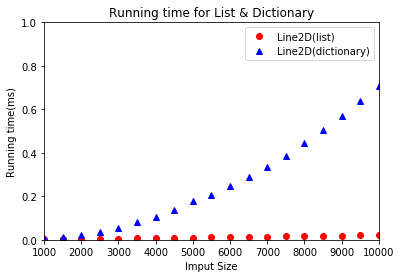

In [126]:
import timeit
import random

# Create the global variables lst1, lst2 & dic
global lst1
global lst2
global dic

# Create the list & dictionary with the size x
def makeListSize(x):
    global lst1
    global lst2
    global dic

    # Make two lists of random 'data with range x'
    lst1 = [random.random() for i in range(x)]
    lst2 = [random.random() for i in range(x)]

    # Create a dictionary of key:val pairs using these two lists
    dic = dict(zip(lst1,lst2)) 

# create two functions for testing deletion of a list and a dictionary
# Solution 1: Delete random number 
def del_lst():
    del lst1[random.randint(0, len(lst1)-1)]

def del_dic():
    del dic[list(dic.keys())[random.randint(0, len(dic)-1)]]
    
# Solution 2: Delete the first number consecutively 
def del_alist():
    del alist[0]
def del_dic():
    d_keys=list(dic.keys())
    del dic[d_keys[0]]
    
# Time the deletion for the list and dictionary 
    
lst_DelTime = timeit.Timer("del_lst()", "from __main__ import del_lst")
dic_DelTime = timeit.Timer("del_dic()", "from __main__ import del_dic") 

# Build the dictionary in order to plot the list and the dictionary  
lt_times = dict()
dt_times = dict()
for i in range(1000,10001,500):
    makeListSize(i)
    lt = lst_DelTime.timeit(number=i)
    dt = dic_DelTime.timeit(number=i)
    lt_times[i] = lt
    dt_times[i]= dt
    
# Plot the running time for the list and the dictionary 
l1,=plt.plot(list(lt_times.keys()), list(lt_times.values()), 'ro',label="list")
l2,=plt.plot(list(dt_times.keys()), list(dt_times.values()), 'b^',label="dictionary")
plt.axis([1000,10000,0,0.2])
plt.title("Running time for List & Dictionary")
plt.xlabel("Input Deletion Size")
plt.ylabel("Running time(ms)")
legend=plt.legend([l1,l2])
plt.show()



## Testing

For full credit, you must also test your solution so that you can prove to the grade your solution works.

In [43]:
makeListSize(6000)

# Set the test for timing the deletion 
t1 = timeit.Timer("del_lst()", "from __main__ import del_lst")
print("del_lst",t1.timeit(number=Size), "milliseconds")
    
t2 = timeit.Timer("del_dic()", "from __main__ import del_dic")
print("del_dic",t2.timeit(number=Size), "milliseconds")

del_lst 0.005769168998085661 milliseconds
del_dic 0.1715412119992834 milliseconds


In [44]:
makeListSize(10000)

# Set the test for timing the deletion 
t1 = timeit.Timer("del_lst()", "from __main__ import del_lst")
print("del_lst",t1.timeit(number=Size), "milliseconds")
    
t2 = timeit.Timer("del_dic()", "from __main__ import del_dic")
print("del_dic",t2.timeit(number=Size), "milliseconds")

del_lst 0.01471688899982837 milliseconds
del_dic 0.33942507800020394 milliseconds


In [94]:
print("lst_DelTime() dic_DelTime()")
lt_times = dict()
dt_times = dict()
for i in range(1000,10001,500):
    makeListSize(i)
    lt = lst_DelTime.timeit(number=i)
    dt = dic_DelTime.timeit(number=i)
    lt_times[i] = lt
    dt_times[i]= dt

lst_DelTime() dic_DelTime()
